### Figure 11

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

rate
0.006901157613535174 0.5
0.008459483526268923 0.4444444444444445
CV
Zipf
31.506522350860262 2.1274474533403103 2.0336727572643065
74.88413506799905 9.789769671349985 4.045695923724467
33.46546236091085 9.299750151934635 2.434097706879362


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

0

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

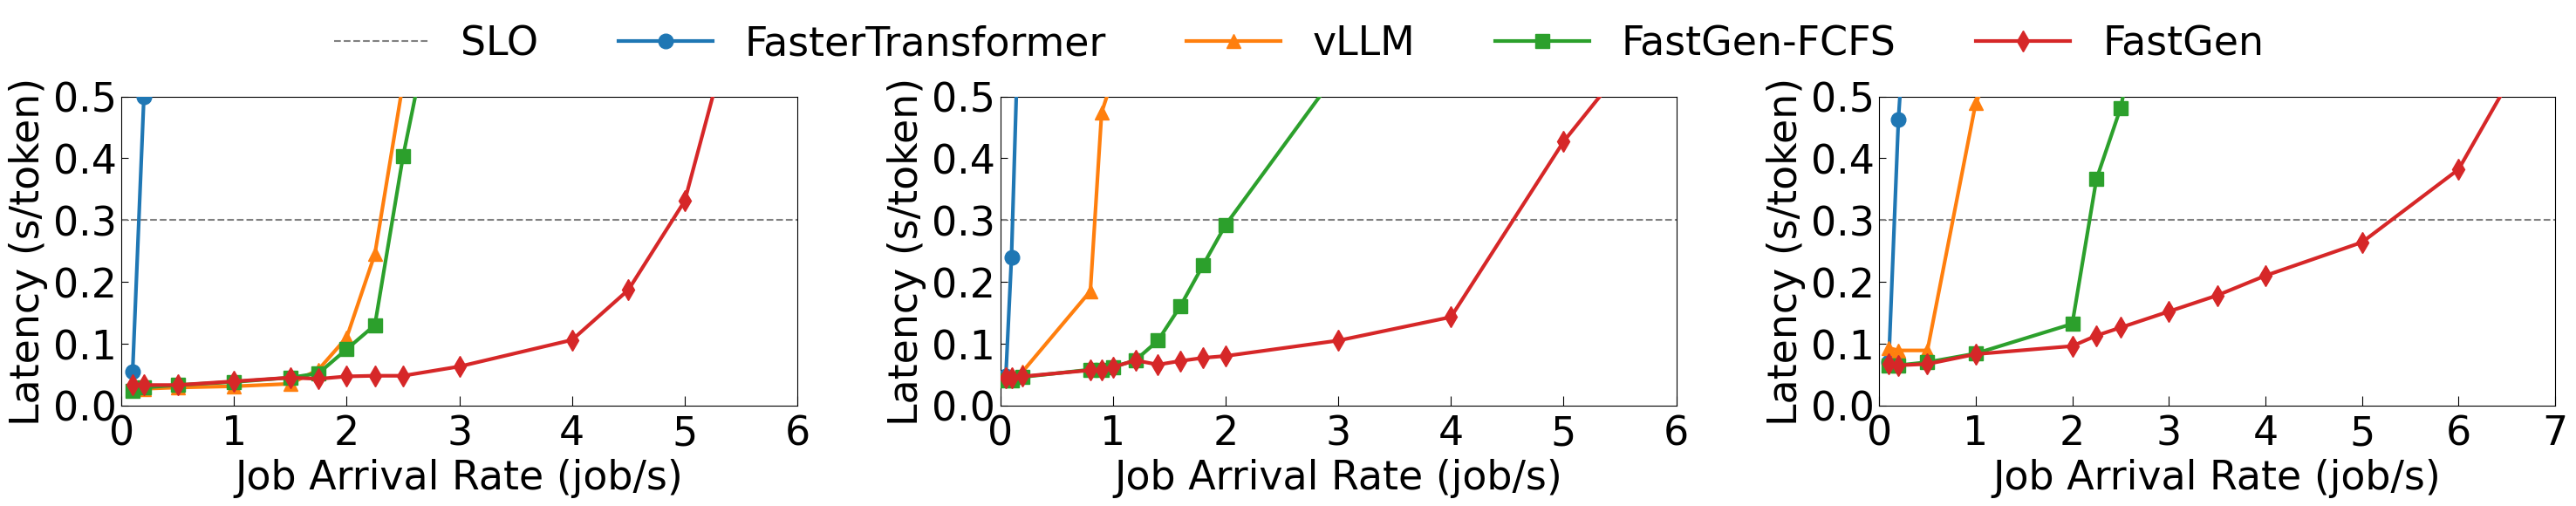

In [9]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import palettable
import random
from scipy.interpolate import interp1d

sysname = 'FastGen'

# Set font and figure size
font_size = 33
marker_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)
fig_size = (36, 4.6)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

num_subfigs = 3
num_curves = 4

# line setting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels = {0: 'FasterTransformer', 1: 'vLLM', 2:'FastGen-FCFS', 3:'FastGen'}
markers = {0: 'o', 1: '^', 2: 's' , 3: 'd'}

# x-axis setting
x_labels = {0: 'Job Arrival Rate (job/s)', 1: 'Job Arrival Rate (job/s)', 2: 'Job Arrival Rate (job/s)', 3: '(d) NO. of slots'}

# y-axis setting
y_label = 'Latency (s/token)'

rate_y = [[0.054, 0.499,	1.376,	4.492] + [4.492] * 12,
          [0.027,	0.027,	0.029,	0.031,	0.035,	0.058,	0.110,	0.245,	0.522,	0.972,	1.59] + [1.59] * 5,
          [0.024, 0.029,	0.033,	0.038,	0.045,	0.052,	0.091,	0.13,	0.403,	0.849,	1.459] + [1.459] * 5,
          [0.034, 0.033,	0.033,	0.039,	0.045,	0.043,	0.047,	0.048,	0.048,	0.063,	0.106,	0.187,	0.331,	0.671,	0.856,	1.425]]
rate_x = [0.1, 0.2,	0.5,	1,	1.5,	1.75,	2,	2.25,	2.5,	3,	4,	4.5,	5,	5.5,	6,	10]
rate_x_ticks = [i * 1 for i in range(0, 7, 1)] # [4, 8, 12, 16]
rate_y_ticks = [i * 0.1 for i in range(0, 6, 1)] # [150, 300, 450, 600]
print('rate')
times_1 = []
times_2 = []
for i in range(len(rate_y[0])):
    times_1.append(rate_y[1][i] / rate_y[0][i])
    times_2.append(rate_y[2][i] / rate_y[0][i])
print(min(times_1), max(times_1))
print(min(times_2), max(times_2))

cv_y = [[0.048,	0.24,	0.853] + [0.853] * 21,
        [0.050,	0.049, 0.055,	0.185,	0.474,	0.530,	0.553,	0.553,	0.573,	0.575,	0.629,	0.633,	0.652,	0.720,	0.744,	0.800] + [0.800]*8,
        [0.04,	0.04,	0.046,	0.058,	0.058,	0.062,	0.066,	0.073,	0.081,	0.083,	0.095,	0.105,	0.135,	0.161,	0.198,	0.227,	0.263,	0.292,	0.541] + [0.541]*5,
        [0.045,	0.045,	0.047,	0.057,	0.058,	0.062,	0.061,	0.073,	0.067,	0.067,	0.066,	0.066,	0.068,	0.072,	0.082,	0.077,	0.079,	0.08,	0.105,	0.143,	0.427,	0.654,	0.22,	0.351],
        ]
cv_x =  [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.1,	1.2,	1.25,	1.3,	1.35,	1.4,	1.5,	1.6,	1.7,	1.8,	1.9,	2,	3,	4,	5,	6,	7,	9]
cv_x_ticks = [i * 1 for i in range(0, 7, 1)]
cv_y_ticks = [i * 0.1 for i in range(0, 6, 1)]
print('CV')

zipf_y = [
        [0.07, 0.463,	1.181,	2.714] + [2.714] * 9,
        [0.093,	0.089,	0.089,	0.489,	0.839,	1.27,	1.52] + [1.52] * 6,
        [0.065, 0.065,	0.07,	0.084,	0.132,	0.366,	0.481,	0.849] + [0.849] * 5,
        [0.067, 0.065,	0.067,	0.083,	0.096,	0.113,	0.126,	0.152,	0.178,	0.21,	0.264,	0.382,	0.519]
        ]
zipf_x = [0.1, 0.2,	0.5,	1,	2,	2.25,	2.5,	3,	3.5,	4,	5,	6,	6.5]
zipf_x_ticks = [i * 1 for i in range(0, 8, 1)]
zipf_y_ticks = [i * 0.1 for i in range(0, 6, 1)]
print('Zipf')

# Plot x ticks and label
for j in range(num_subfigs):
    if j == 0:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=1.2)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(rate_x_ticks)
    if j == 1:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=1.2)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(cv_x_ticks)
    if j == 2:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=1.2)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(zipf_x_ticks)
        
# Plot y ticks and label
for j in range(num_subfigs):
    if j == 0:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(rate_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    if j == 1:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(cv_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    if j == 2:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(zipf_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    axes[j].get_yaxis().set_tick_params(direction='in', pad=4)

horizontal_lines = [0.3, 0.3, 0.3]
slo_line = None
# Plot horizontal lines
for j in range(num_subfigs):
    slo_line = axes[j].axhline(horizontal_lines[j], linestyle='--', color='gray', label='SLO')

# Plot curves
lines = [None for i in range(num_curves)]
for j in range(num_subfigs):
    if j == 0 :
        lines[0], = axes[j].plot(rate_x, rate_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[1], = axes[j].plot(rate_x, rate_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[2], = axes[j].plot(rate_x, rate_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[3], = axes[j].plot(rate_x, rate_y[3], label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        f_ft = interp1d(rate_y[0], rate_x, kind='linear')
        f_ft_val = f_ft(0.3)
        f_vllm = interp1d(rate_y[1], rate_x, kind='linear')
        f_vllm_val = f_vllm(0.3)
        f_fcfs = interp1d(rate_y[2], rate_x, kind='linear')
        f_fcfs_val = f_fcfs(0.3)
        f_fastgen = interp1d(rate_y[3], rate_x, kind='linear')
        f_fastgen_val = f_fastgen(0.3)
        print(f_fastgen_val / f_ft_val, f_fastgen_val / f_vllm_val, f_fastgen_val / f_fcfs_val)
    if j == 1:
        lines[0], = axes[j].plot(cv_x, cv_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        new_x = [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.1, 1.3, 1.5, 1.7,	2,	3,	4, 5, 6, 7, 9]
        new_index = [cv_x.index(i) for i in new_x]
        new_y = [cv_y[1][i] for i in new_index]
        lines[1], = axes[j].plot(new_x, new_y, label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        new_x = [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.2, 1.4, 1.6, 1.8,	2,	3,	4, 5]
        new_index = [cv_x.index(i) for i in new_x]
        new_y = [cv_y[2][i] for i in new_index]
        lines[2], = axes[j].plot(new_x, new_y, label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        new_x = [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.2, 1.4, 1.6, 1.8,	2,	3,	4, 5, 6, 7, 9]
        new_index = [cv_x.index(i) for i in new_x]
        new_y = [cv_y[3][i] for i in new_index]
        lines[3], = axes[j].plot(new_x, new_y, label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        f_ft = interp1d(cv_y[0], cv_x, kind='linear')
        f_ft_val = f_ft(0.3)
        f_vllm = interp1d(cv_y[1], cv_x, kind='linear')
        f_vllm_val = f_vllm(0.3)
        f_fcfs = interp1d(cv_y[2], cv_x, kind='linear')
        f_fcfs_val = f_fcfs(0.3)
        f_fastgen = interp1d(cv_y[3], cv_x, kind='linear')
        f_fastgen_val = f_fastgen(0.3)
        print(f_fastgen_val / f_ft_val, f_fastgen_val / f_vllm_val, f_fastgen_val / f_fcfs_val)
    if j == 2:
        lines[0], = axes[j].plot(zipf_x, zipf_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[1], = axes[j].plot(zipf_x, zipf_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[2], = axes[j].plot(zipf_x, zipf_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[3], = axes[j].plot(zipf_x, zipf_y[3], label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        f_ft = interp1d(zipf_y[0], zipf_x, kind='linear')
        f_ft_val = f_ft(0.3)
        f_vllm = interp1d(zipf_y[1], zipf_x, kind='linear')
        f_vllm_val = f_vllm(0.3)
        f_fcfs = interp1d(zipf_y[2], zipf_x, kind='linear')
        f_fcfs_val = f_fcfs(0.3)
        f_fastgen = interp1d(zipf_y[3], zipf_x, kind='linear')
        f_fastgen_val = f_fastgen(0.3)
        print(f_fastgen_val / f_ft_val, f_fastgen_val / f_vllm_val, f_fastgen_val / f_fcfs_val)
# Plot legend
fig.legend(handles=[slo_line, lines[0], lines[1], lines[2], lines[3]], handlelength=2.36, 
           ncol=num_curves+1, loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, prop={'size':font_size})

# Save the figure
file_path = './eval/overall.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)
os.system('ps2pdf -dEPSCrop ./eval/overall.pdf ./eval/overall_.pdf')


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

14.055606247651765 2.7632653802167484 1.9834067151885464
15.77289185859868 2.881169681119476 1.699084855840194
9.490514905149052 3.3249460994828928 1.6254059591534253


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

0

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

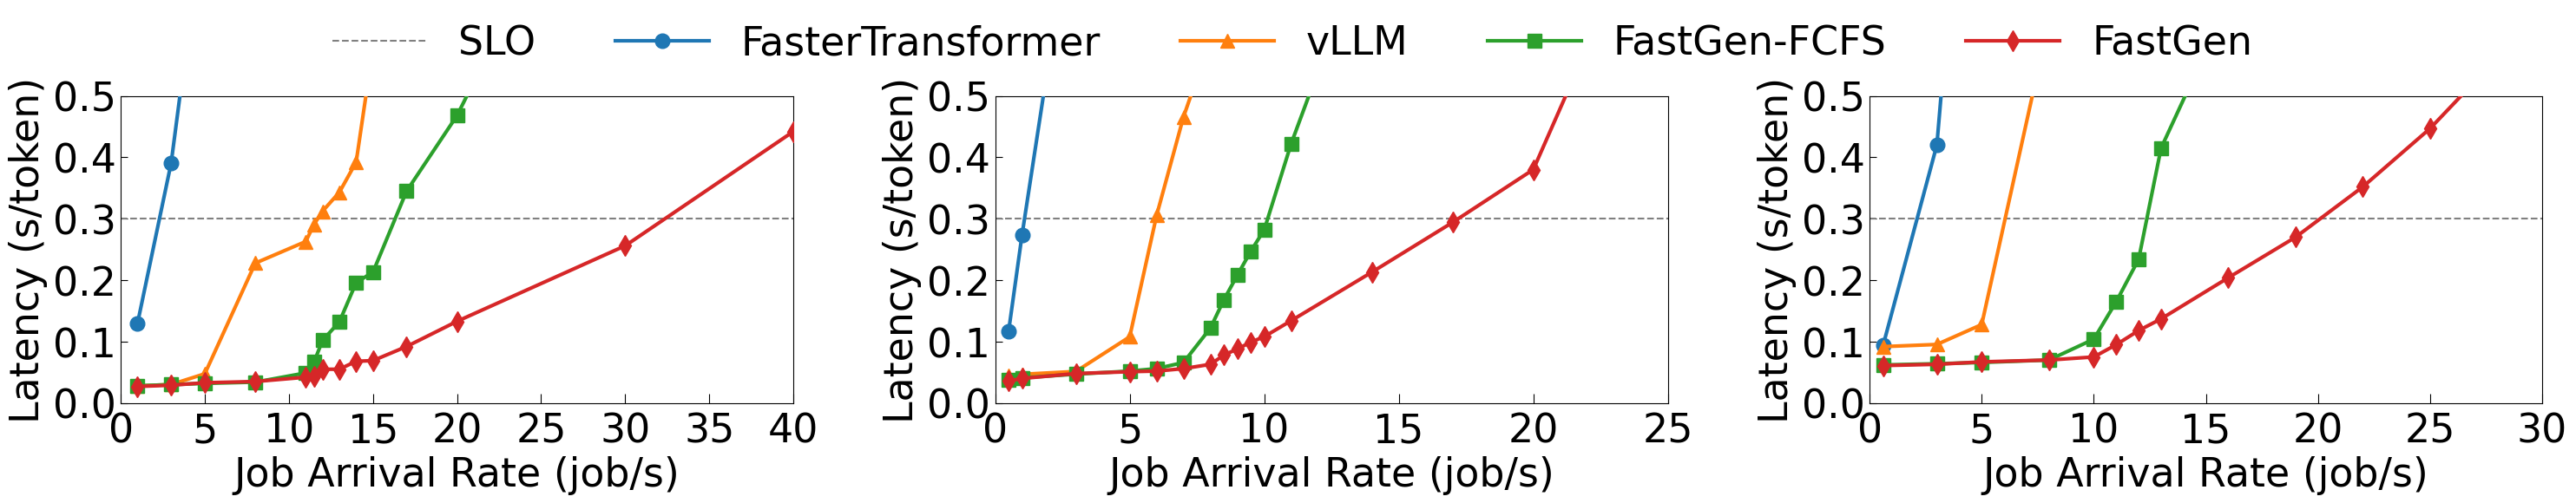

In [10]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import palettable
import random

# Set font and figure size
font_size = 33
marker_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)
fig_size = (36, 4.6)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

num_subfigs = 3
num_curves = 4

# line setting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels = {0: 'FasterTransformer', 1: 'vLLM', 2:'FastGen-FCFS', 3:'FastGen'}
markers = {0: 'o', 1: '^', 2: 's' , 3: 'd'}

# x-axis setting
x_labels = {0: 'Job Arrival Rate (job/s)', 1: 'Job Arrival Rate (job/s)', 2: 'Job Arrival Rate (job/s)', 3: '(d) NO. of slots'}

# y-axis setting
y_label = 'Latency (s/token)'

opt13b_y = [
          [0.13, 	0.391,	0.81] + [0.81] * 11,
          [0.02775,	0.03015,	0.04758,	0.22768,	0.26285,	0.29096,	0.3122,	0.34297,	0.39218,	0.57822,	0.7627] + [0.866] * 3,
          [0.028,	0.03,	0.032,	0.034,	0.049,	0.067,	0.102,	0.132,	0.196,	0.213,	0.345,	0.468,	1.015] + [1.015] * 1,
          [0.027,	0.029,	0.033,	0.035,	0.042,	0.044,	0.055,	0.055,	0.068,	0.069,	0.092,	0.133,	0.256,	0.442],
        ]

opt13b_x =  [1,	3,	5,	8,	11,	11.5,	12,	13,	14,	15,	17,	20,	30,	40]
opt13b_x_ticks = [i * 1 for i in range(0, 41, 5)] # [4, 8, 12, 16]
opt13b_y_ticks = [i * 0.1 for i in range(0, 6, 1)] # [150, 300, 450, 600]

opt66b_y = [
        [0.117, 0.274,	0.845,	1.849] + [1.849] * 15,
        [0.04464,	0.04679, 0.05138,	0.10773, 0.30533,	0.46584, 0.59215, 0.64256, 0.68183, 0.72802, 0.77899, 1.03307, 1.57631, 2.03876] + [2.298] * 5,
        [0.038, 0.041,	0.047,	0.052,	0.056,	0.066,	0.122,	0.168,	0.208,	0.247,	0.282,	0.422,	0.777,	1.086] + [1.086] * 5,
        [0.036, 0.04,	0.048,	0.051,	0.052,	0.056,	0.063,	0.078,	0.088,	0.099,	0.108,	0.134,	0.213,	0.294,	0.38,	0.579,	0.94,	0.94, 0.94],
        ]
opt66b_x =  [0.5, 1,	3,	5,	6,	7,	8,	8.5,	9,	9.5,	10,	11,	14,	17,	20,	22,	22,	23,	26]
opt66b_x_ticks = [i * 1 for i in range(0, 26, 5)]
opt66b_y_ticks = [i * 0.1 for i in range(0, 6, 1)]

opt175b_y = [
        [0.0936,	0.42,	1.2792,	2.0784,	2.454] + [2.454] * 12,
        [0.09182,	0.09534,	0.12771,	0.62257,	0.83727,	1.04916,	1.30961,	1.43056,	1.82934,	2.41264] + [2.41264] * 7,
        [0.062,	0.064,	0.066,	0.07,	0.104,	0.165,	0.234,	0.415,	0.652,	0.986] + [0.986] * 7,
        [0.061,	0.063,	0.067,	0.07,	0.075,	0.095,	0.118,	0.137,	0.204,	0.27,	0.352,	0.447,	0.562,	0.685,	0.813,	0.958,	1.098]
        ]
opt175b_x = [0.6,	3,	5,	8,	10,	11,	12,	13,	16,	19,	22,	25,	28,	31,	34,	37,	40]
opt175b_x_ticks = [i * 1 for i in range(0, 31, 5)]
opt175b_y_ticks = [i * 0.1 for i in range(0, 6, 1)]

# Plot x ticks and label
for j in range(num_subfigs):
    if j == 0:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=3.5)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(opt13b_x_ticks)
    if j == 1:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=3.5)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(opt66b_x_ticks)
    if j == 2:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=3.5)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(opt175b_x_ticks)
        
# Plot y ticks and label
for j in range(num_subfigs):
    if j == 0:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.4)
        axes[j].set_yticks(opt13b_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    if j == 1:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(opt66b_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    if j == 2:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(opt175b_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    axes[j].get_yaxis().set_tick_params(direction='in', pad=4)

# Plot horizontal lines
slo_line = None
for j in range(num_subfigs):
    slo_line = axes[j].axhline(horizontal_lines[j], linestyle='--', color='gray', label='SLO')

# Plot curves
lines = [None for i in range(num_curves)]
for j in range(num_subfigs):
    if j == 0 :
        lines[0], = axes[j].plot(opt13b_x, opt13b_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[1], = axes[j].plot(opt13b_x, opt13b_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[2], = axes[j].plot(opt13b_x, opt13b_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[3], = axes[j].plot(opt13b_x, opt13b_y[3], label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        f_ft = interp1d(opt13b_y[0], opt13b_x, kind='linear')
        f_ft_val = f_ft(0.3)
        f_vllm = interp1d(opt13b_y[1], opt13b_x, kind='linear')
        f_vllm_val = f_vllm(0.3)
        f_fcfs = interp1d(opt13b_y[2], opt13b_x, kind='linear')
        f_fcfs_val = f_fcfs(0.3)
        f_fastgen = interp1d(opt13b_y[3], opt13b_x, kind='linear')
        f_fastgen_val = f_fastgen(0.3)
        print(f_fastgen_val / f_ft_val, f_fastgen_val / f_vllm_val, f_fastgen_val / f_fcfs_val)
    if j == 1:
        lines[0], = axes[j].plot(opt66b_x, opt66b_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[1], = axes[j].plot(opt66b_x, opt66b_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[2], = axes[j].plot(opt66b_x, opt66b_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[3], = axes[j].plot(opt66b_x, opt66b_y[3], label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        f_ft = interp1d(opt66b_y[0], opt66b_x, kind='linear')
        f_ft_val = f_ft(0.3)
        f_vllm = interp1d(opt66b_y[1], opt66b_x, kind='linear')
        f_vllm_val = f_vllm(0.3)
        f_fcfs = interp1d(opt66b_y[2], opt66b_x, kind='linear')
        f_fcfs_val = f_fcfs(0.3)
        f_fastgen = interp1d(opt66b_y[3], opt66b_x, kind='linear')
        f_fastgen_val = f_fastgen(0.3)
        print(f_fastgen_val / f_ft_val, f_fastgen_val / f_vllm_val, f_fastgen_val / f_fcfs_val)
    if j == 2:
        lines[0], = axes[j].plot(opt175b_x, opt175b_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[1], = axes[j].plot(opt175b_x, opt175b_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[2], = axes[j].plot(opt175b_x, opt175b_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[3], = axes[j].plot(opt175b_x, opt175b_y[3], label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        f_ft = interp1d(opt175b_y[0], opt175b_x, kind='linear')
        f_ft_val = f_ft(0.3)
        f_vllm = interp1d(opt175b_y[1], opt175b_x, kind='linear')
        f_vllm_val = f_vllm(0.3)
        f_fcfs = interp1d(opt175b_y[2], opt175b_x, kind='linear')
        f_fcfs_val = f_fcfs(0.3)
        f_fastgen = interp1d(opt175b_y[3], opt175b_x, kind='linear')
        f_fastgen_val = f_fastgen(0.3)
        print(f_fastgen_val / f_ft_val, f_fastgen_val / f_vllm_val, f_fastgen_val / f_fcfs_val)

# Plot legend
fig.legend(handles=[slo_line, lines[0], lines[1], lines[2], lines[3]], handlelength=2.36, 
           ncol=num_curves+1, loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, prop={'size':font_size})

# Save the figure
file_path = './eval/overall2.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)
os.system('ps2pdf -dEPSCrop ./eval/overall2.pdf ./eval/overall2_.pdf')

### Figure 12

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

0

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

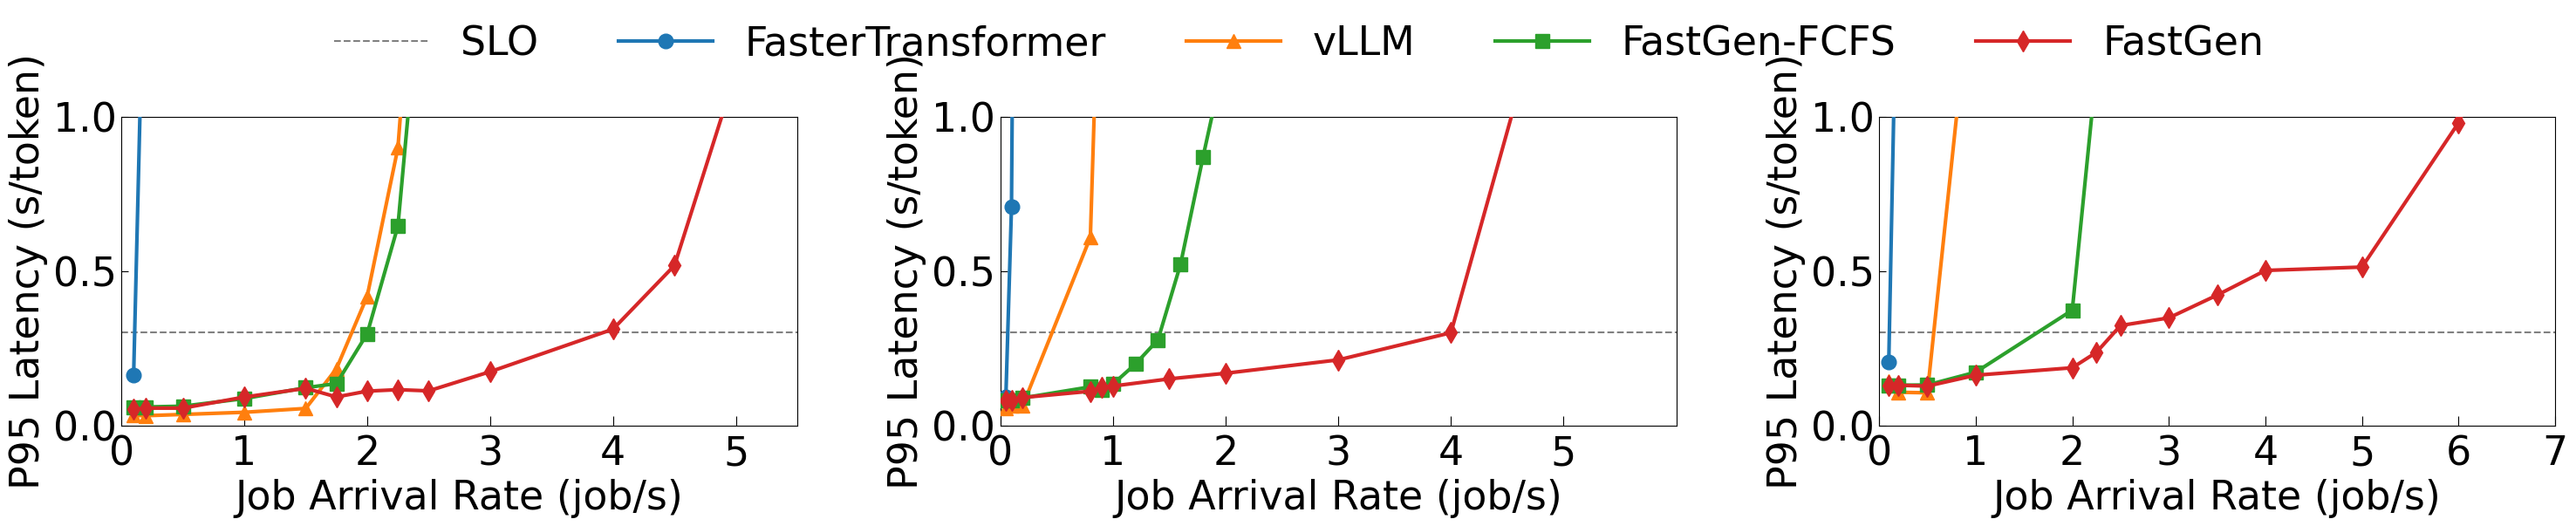

In [13]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import palettable
import random

sysname = 'FastGen'

# Set font and figure size
font_size = 33
marker_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)
fig_size = (36, 4.6)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

num_subfigs = 3
num_curves = 4

# line setting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels = {0: 'FasterTransformer', 1: 'vLLM', 2:'FastGen-FCFS', 3:'FastGen'}
markers = {0: 'o', 1: '^', 2: 's' , 3: 'd'}

# x-axis setting
x_labels = {0: 'Job Arrival Rate (job/s)', 1: 'Job Arrival Rate (job/s)', 2: 'Job Arrival Rate (job/s)', 3: '(d) NO. of slots'}

# y-axis setting
y_label = 'P95 Latency (s/token)'

rate_y = [
          [0.16428, 1.803368,	5.184494,	16.268263] + [16]*12,
          [0.03229,	0.03162,	0.03563,	0.0426,	0.05505,	0.18366,	0.41803,	0.89866,	2.19519,	3.81093252,	6.517877053] + [8] * 5,
          [0.0587,	0.0598, 0.0623197,	0.086942,	0.1221444,	0.1354664,	0.2969137,	0.6454739,	1.7353136,	3.3077605,	5.8794578] + [8] * 5,
          [0.052,	0.0560346, 0.0560346,	0.0918281,	0.1201701,	0.0923105,	0.1110426,	0.1157482,	0.1119093,	0.1739246,	0.3116412,	0.5178464,	1.1445936,	3.564802,	3.9749703,	6.4170222],
        ]
rate_x = [0.1, 0.2,	0.5,	1,	1.5,	1.75,	2,	2.25,	2.5,	3,	4,	4.5,	5,	5.5,	6, 10]
rate_x_ticks = [i * 1 for i in range(0, 6, 1)] # [4, 8, 12, 16]
rate_y_ticks = [i * 0.1 for i in range(0, 15, 5)] # [150, 300, 450, 600]
cv_y = [[0.09254,	0.707012,	5.766052] + [6] * 21,
        [0.05644,	0.06353,	0.06451,	0.60908,	1.78223,	2.43322,	2.6433,	2.27831,	2.3977,	2.48246,	2.8247,	2.7128,	2.85258,	3.13444,	3.2125,	3.86183] + [3.9] * 8,
        [0.082,	0.082,	0.089146,	0.124865,	0.114429,	0.133499,	0.158648,	0.198712,	0.193935,	0.228946,	0.225818,	0.277213,	0.469342,	0.5212,	0.76666,	0.869294,	1.03563,	1.201227,	2.31223] + [3] * 5,
        [0.08,	0.08,	0.090363,	0.1107,	0.124152,	0.127446,	0.139902,	0.188429,	0.146601,	0.143824,	0.153316,	0.147161,	0.150717,	0.157222,	0.161626,	0.159523,	0.150389,	0.168885,	0.21217,	0.30006,	1.603855,	2.781914,	0.623288,	0.94561],
        ]
cv_x =  [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.1,	1.2,	1.25,	1.3,	1.35,	1.4,	1.5,	1.6,	1.7,	1.8,	1.9,	2,	3,	4,	5, 6, 7, 9]

cv_x_ticks = [i * 1 for i in range(0, 6, 1)]
cv_y_ticks = [i * 0.1 for i in range(0, 15, 5)]

zipf_y = [
        [0.20405, 1.77345,	3.489084,	11.097774] + [12] * 10,
        [0.14218,	0.10734,	0.10564,	1.58716,	3.37713,	5.64351,	5.89492] + [5.9] * 7,
        [0.130221, 0.130221,	0.13103,	0.172319,	0.373002,	1.153916,	1.933691,	4.080423] + [4.5] * 6,
        [0.130085, 0.130085,	0.127374,	0.16257,	0.186646,	0.236526,	0.323439,	0.348147,	0.4218,	0.501714,	0.512546,	0.979765,	1.331655, 3.449698]
        ]
zipf_x = [0.1, 0.2,	0.5,	1,	2,	2.25,	2.5,	3,	3.5,	4,	5,	6,	6.5, 7]
zipf_x_ticks = [i * 1 for i in range(0, 8, 1)]
zipf_y_ticks = [i * 0.1 for i in range(0, 15, 5)]

# Plot x ticks and label
for j in range(num_subfigs):
    if j == 0:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=5.5)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(rate_x_ticks)
    if j == 1:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=6)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(cv_x_ticks)
    if j == 2:
        axes[j].set_xlabel(x_labels[j])
        axes[j].set_xlim(left=0, right=1.2)
        axes[j].get_xaxis().set_tick_params(direction='in', pad=7)
        axes[j].get_xaxis().set_tick_params(which='minor', direction='in')
        axes[j].set_xticks(zipf_x_ticks)
        
# Plot y ticks and label
for j in range(num_subfigs):
    if j == 0:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(rate_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    if j == 1:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(cv_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    if j == 2:
        axes[j].set_ylabel(y_label)
        axes[j].set_ylim(bottom=0, top=0.5)
        axes[j].set_yticks(zipf_y_ticks)
        axes[j].get_yaxis().set_tick_params('major', direction='in', pad=4)
    axes[j].get_yaxis().set_tick_params(direction='in', pad=4)

horizontal_lines = [0.3, 0.3, 0.3]
# Plot horizontal lines
slo_line = None
for j in range(num_subfigs):
    slo_line = axes[j].axhline(horizontal_lines[j], linestyle='--', color='gray', label='SLO')


# Plot curves
lines = [None for i in range(num_curves)]
for j in range(num_subfigs):
    if j == 0 :
        lines[0], = axes[j].plot(rate_x, rate_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[1], = axes[j].plot(rate_x, rate_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[2], = axes[j].plot(rate_x, rate_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[3], = axes[j].plot(rate_x, rate_y[3], label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
    if j == 1:
        lines[0], = axes[j].plot(cv_x, cv_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        new_x = [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.1, 1.3, 1.5, 1.7,	2,	3,	4, 5, 6, 7, 9]
        new_index = [cv_x.index(i) for i in new_x]
        new_y = [cv_y[1][i] for i in new_index]
        lines[1], = axes[j].plot(new_x, new_y, label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        new_x = [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.2, 1.4, 1.6, 1.8,	2,	3,	4]
        new_index = [cv_x.index(i) for i in new_x]
        new_y = [cv_y[2][i] for i in new_index]
        lines[2], = axes[j].plot(new_x, new_y, label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        new_x = [0.05,	0.1,	0.2,	0.8,	0.9,	1,	1.5,	2,	3,	4,	5, 6, 7, 9]
        new_index = [cv_x.index(i) for i in new_x]
        new_y = [cv_y[3][i] for i in new_index]
        lines[3], = axes[j].plot(new_x, new_y, label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
    if j == 2:
        lines[0], = axes[j].plot(zipf_x, zipf_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[1], = axes[j].plot(zipf_x, zipf_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)    
        lines[2], = axes[j].plot(zipf_x, zipf_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
        lines[3], = axes[j].plot(zipf_x, zipf_y[3], label=labels[3], marker = markers[3], color=colors[3], lw=3, markersize=marker_size, linestyle='solid',zorder=3)

# Plot legend
fig.legend(handles=[slo_line, lines[0], lines[1], lines[2], lines[3]], handlelength=2.36, 
           ncol=num_curves+1, loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=False, prop={'size':font_size})

# Save the figure
file_path = './eval/fairness.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)
os.system('ps2pdf -dEPSCrop ./eval/fairness.pdf ./eval/fairness_.pdf')


### Figure 14

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not fou

[array(2.7087156), array(2.86363636), array(3.70625)]
1.368268416596105 1.2942460317460316
[array(2.61442786), array(3.00651466), array(3.5160804)]
1.344875662804986 1.1694871976349788


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Aria

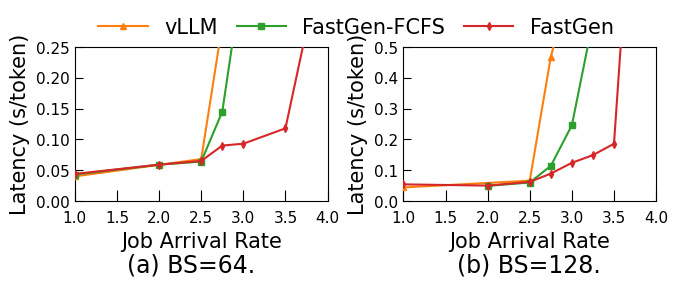

In [15]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import palettable
import random
from scipy.interpolate import interp1d

sysname = 'FastGen'

num_subfigs = 2
num_curves = 3

# Set font and figure size
font_size = 15
marker_size = 4
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)
fig_size = (7.5, 2)
fig, axes = plt.subplots(nrows=1, ncols=num_subfigs, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# line setting
colors = ['C1', 'C2', 'C3', 'C4']
labels = {0: 'vLLM', 1:sysname+'-FCFS', 2:sysname}
markers = {0: '^', 1: 's' , 2: 'd'}

# x-axis setting
x_labels = {0: 'Job Arrival Rate', 1: 'Job Arrival Rate'}

# y-axis setting
y_label = 'Latency (s/token)'

xs = [
    # Figure 1
    [
        # vLLM
        [1, 2.5, 2.75, 3],
        # FastGen-FCFS
        [1, 2, 2.5, 2.75, 3],
        # FastGen
        [1, 2, 2.5, 2.75, 3, 3.5, 3.75],
    ],
    # Figure 2
    [
        # vLLM
        [1, 2.5, 2.75, 3],
        # FastGen-FCFS
        [2, 2.5, 2.75, 3, 3.25, 3.5],
        # FastGen
        [1, 2, 2.5, 2.75, 3, 3.25, 3.5, 3.75]
    ],
]
ys = [
    # Figure 1
    [
        # vLLM
        [0.04, 0.068, 0.286, 0.839],
        # FastGen-FCFS
        [0.043, 0.059, 0.064, 0.145, 0.376],
        # FastGen
        [0.044, 0.059, 0.065, 0.09, 0.093, 0.118, 0.278],
    ],
    # Figure 2
    [
        # vLLM
        [0.044, 0.066, 0.468, 0.724],
        # FastGen-FCFS
        [0.049, 0.06, 0.114, 0.246, 0.585, 0.553],
        # FastGen
        [0.054, 0.05, 0.062, 0.089, 0.124, 0.149, 0.186, 1.181],
    ],
]
y_limits = [0.25, 0.5]
x_ticks = [i * 0.25 for i in range(4, 17, 2)] # [4, 8, 12, 16]
y_ticks_list = [
    [i * 0.025 for i in range(0, 11, 2)],
    [i * 0.050 for i in range(0, 11, 2)],
]

handles = [None for i in range(num_curves)]
for j in range(num_subfigs):
    ax: plt.Axes = axes[j] if num_subfigs > 1 else axes
    
    # Plot x ticks and label
    ax.set_xlabel(x_labels[j])
    ax.set_xlim(left=1.0, right=1.2)
    ax.get_xaxis().set_tick_params(direction='in', pad=7)
    ax.get_xaxis().set_tick_params(which='minor', direction='in')
    ax.set_xticks(x_ticks)
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
        
    # Plot y ticks and label
    ax.set_ylabel(y_label)
    ax.set_ylim(bottom=0, top=y_limits[j])
    ax.set_yticks(y_ticks_list[j])
    ax.get_yaxis().set_tick_params('major', direction='in', pad=4)
    ax.get_yaxis().set_tick_params(direction='in', pad=4)

    # Plot curves
    f_list: list = []
    for i in range(num_curves):
        handles[i], = ax.plot(xs[j][i], ys[j][i], label=labels[i], marker=markers[i], color=colors[i], markersize=marker_size, linestyle='solid', zorder=3)
        
        f_inter = interp1d(ys[j][i], xs[j][i], kind='linear')
        f_inter_val = f_inter(0.25)
        f_list.append(f_inter_val)
    print(f_list)
    print(f_list[2] / f_list[0], f_list[2] / f_list[1])
    
    # Plot grid
fig.text(0.28, -0.27, '(a) BS=64.', fontsize=17, fontname='Times New Roman', 
        color='black', ha='center', va='bottom')
fig.text(0.73, -0.27, '(b) BS=128.', fontsize=17, fontname='Times New Roman',  
        color='black', ha='center', va='bottom')
# Plot legend
fig.legend(
        handles=handles,
        handlelength=2.36, 
        ncol=num_curves,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.12),
        frameon=False,
        prop={'size':font_size},
        columnspacing=0.9
)

# Save the figure
file_path = './eval/large_bs.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)


### Figure 15

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

[array(3.05247525), array(3.42028986), array(4.76859504)]
1.5622059655321237 1.3942078722510154
[array(3.54275093), array(11.7151608), array(15.87150838)]
4.479995544795324 1.3547836564793516


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

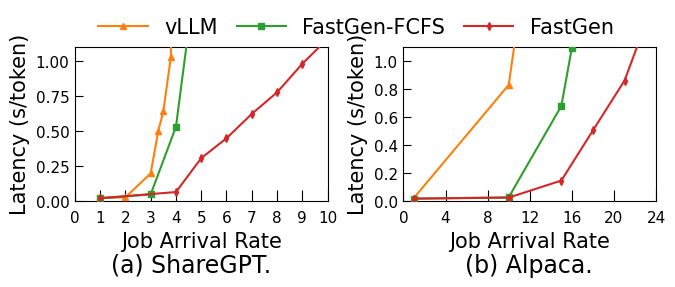

In [16]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import palettable
import random
from scipy.interpolate import interp1d

sysname = 'FastGen'

num_subfigs = 2
num_curves = 3

# Set font and figure size
font_size = 15
marker_size = 4
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)
fig_size = (7.5, 2)
fig, axes = plt.subplots(nrows=1, ncols=num_subfigs, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# line setting
colors = ['C1', 'C2', 'C3', 'C4']
labels = {0: 'vLLM', 1:sysname+'-FCFS', 2:sysname}
markers = {0: '^', 1: 's' , 2: 'd'}

# x-axis setting
x_labels = {0: 'Job Arrival Rate', 1: 'Job Arrival Rate'}

# y-axis setting
y_label = 'Latency (s/token)'

xs = [
    # Figure 1
    [
        # vLLM
        [1, 2, 3, 3.3, 3.5, 3.8, 4],
        # FastGen-FCFS
        [1, 3, 4, 5, 5.5],
        # FastGen
        [1, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ],
    # Figure 2
    [
        # vLLM
        [1, 10, 11, 12],
        # FastGen-FCFS
        [1, 10, 15, 16, 17],
        # FastGen
        [1, 10, 15, 18, 21, 23, 25, 26]
    ],
]
ys = [
    # Figure 1
    [
        # vLLM
        [0.023, 0.026, 0.197, 0.5, 0.64, 1.028, 15.309],
        # FastGen-FCFS
        [0.019, 0.047, 0.53, 1.919, 19.556],
        # FastGen
        [0.02, 0.064, 0.306, 0.448, 0.622, 0.776, 0.98, 1.158, 1.388, 3.593],
    ],
    # Figure 2
    [
        # vLLM
        [0.022, 0.829, 1.353, 21.406],
        # FastGen-FCFS
        [0.017, 0.026, 0.679, 1.094, 8.986],
        # FastGen
        [0.017, 0.024, 0.146, 0.504, 0.86, 1.264, 1.615, 3.669],
    ],
]
y_limits = [1.1, 1.1]
x_ticks = [
    [i for i in range(0, 11, 1)],
    [i for i in range(0, 25, 4)]
]
y_ticks_list = [
    [0, 0.25, 0.5, 0.75, 1],
    [0, 0.2, 0.4, 0.6, 0.8, 1],
]

handles = [None for i in range(num_curves)]
for j in range(num_subfigs):
    ax: plt.Axes = axes[j] if num_subfigs > 1 else axes
    
    # Plot x ticks and label
    ax.set_xlabel(x_labels[j])
    ax.set_xlim(left=1.0, right=1.2)
    ax.get_xaxis().set_tick_params(direction='in', pad=7)
    ax.get_xaxis().set_tick_params(which='minor', direction='in')
    ax.set_xticks(x_ticks[j])
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
        
    # Plot y ticks and label
    ax.set_ylabel(y_label)
    ax.set_ylim(bottom=0, top=y_limits[j])
    ax.set_yticks(y_ticks_list[j])
    ax.get_yaxis().set_tick_params('major', direction='in', pad=4)
    ax.get_yaxis().set_tick_params(direction='in', pad=4)

    # Plot curves
    f_list: list = []
    for i in range(num_curves):
        handles[i], = ax.plot(xs[j][i], ys[j][i], label=labels[i], marker=markers[i], color=colors[i], markersize=marker_size, linestyle='solid', zorder=3)
        
        f_inter = interp1d(ys[j][i], xs[j][i], kind='linear')
        f_inter_val = f_inter(0.25)
        f_list.append(f_inter_val)
    print(f_list)
    print(f_list[2] / f_list[0], f_list[2] / f_list[1])
    
fig.text(0.28, -0.27, '(a) ShareGPT.', fontsize=17, fontname='Times New Roman', 
        color='black', ha='center', va='bottom')
fig.text(0.73, -0.27, '(b) Alpaca.', fontsize=17, fontname='Times New Roman',  
        color='black', ha='center', va='bottom')
# Plot legend
fig.legend(
        handles=handles,
        handlelength=2.36, 
        ncol=num_curves,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.12),
        frameon=False,
        prop={'size':font_size},
        columnspacing=0.9
)

# Save the figure
file_path = './eval/gqa.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)


### Figure 17

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

0

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

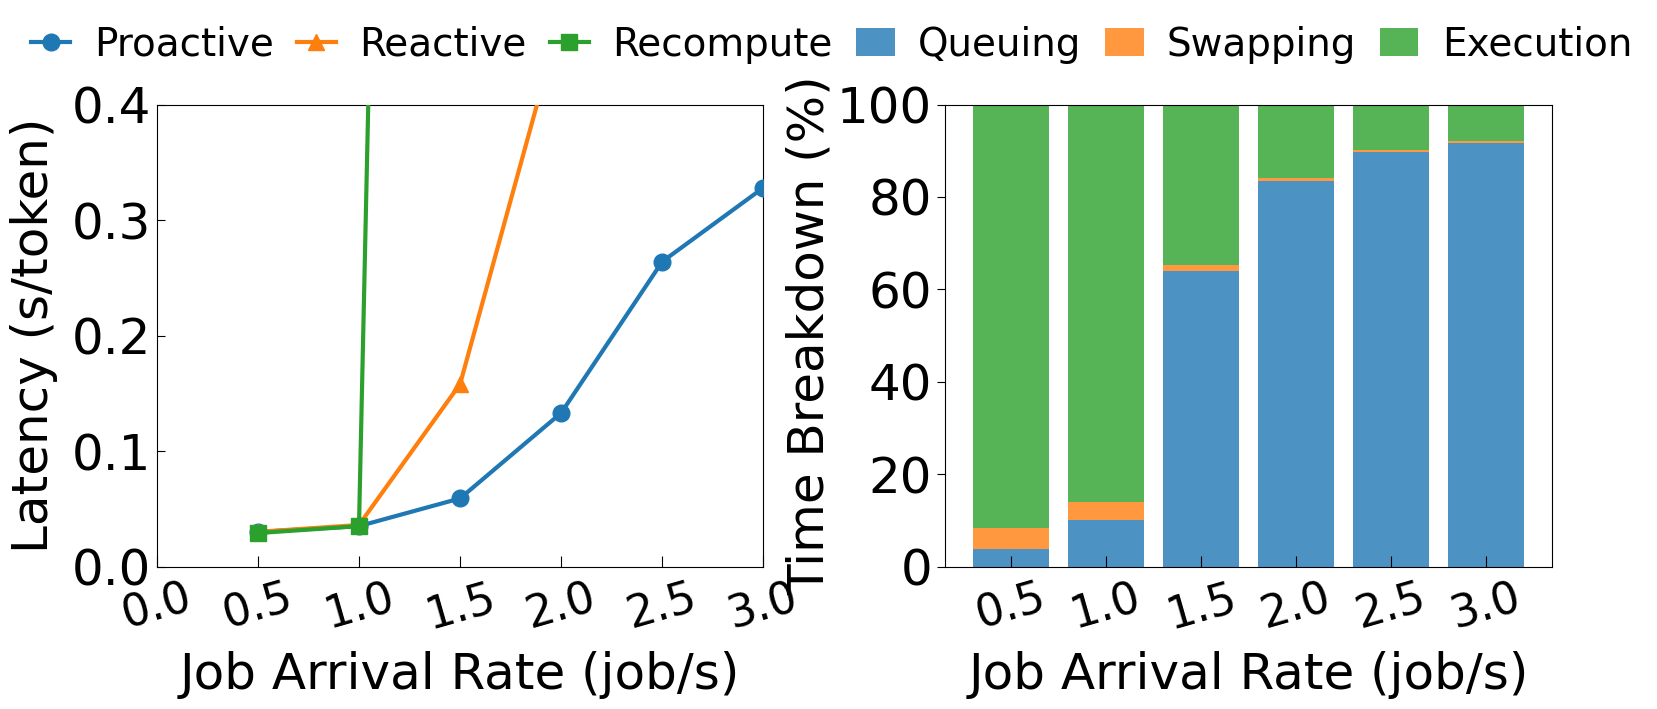

In [17]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import palettable
import random

sysname = 'FastGen'

# Set font and figure size
font_size = 24
marker_size = 12
labelpad = 10
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)
fig_size = (18, 6)
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

num_subfigs = 2
num_curves = 3

# line setting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels = {0: 'Proactive', 1: 'Reactive', 2:'Recompute', 3:''}
markers = {0: 'o', 1: '^', 2: 's' , 3: 'd'}

# y-axis setting
rate_y = [[1.029,	0.906,	0.767,	0.674,	0.535,	0.454,	0.328,	0.264,	0.133,	0.059,	0.035,	0.03],
        [3.044,	2.604,	2.389,	1.941,	1.555,	1.416,	0.891,	0.699,	0.476,	0.158,	0.036,	0.03],
        [3.55,	2.296,	2.552,	2.489,	0.73,	0.832,	0.035,	0.029],
        ]
rate_x_0 = [6,	5.5,	5,	4.5, 4, 	3.5,    3, 	2.5,	2,	1.5,	1,	0.5]
rate_x_1 = [6,	5.5,	5,	4.5, 4, 	3.5,    3, 	2.5,	2,	1.5,	1,	0.5]
rate_x_2 = [1.6,	1.5,	1.4,	1.3,	1.2,	1.1,	1,	0.5]

# Plot curves
lines = [None for i in range(num_curves)]
lines[0], = axes[0].plot(rate_x_0, rate_y[0], label=labels[0], marker = markers[0], color=colors[0], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
lines[1], = axes[0].plot(rate_x_1, rate_y[1], label=labels[1], marker = markers[1], color=colors[1], lw=3, markersize=marker_size, linestyle='solid',zorder=3)
lines[2], = axes[0].plot(rate_x_2, rate_y[2], label=labels[2], marker = markers[2], color=colors[2], lw=3, markersize=marker_size, linestyle='solid',zorder=3)


categories = ['6.0',	'5.5',	'5.0',	'4.5', '4.0', 	'3.5',    '3.0', 	'2.5',	'2.0',	'1.5',	'1.0',	'0.5']
data = np.array([[458.5943341, 0.775854418, 14.3898115], [407.6012548, 0.802894492, 14.27585075], [355.18022, 0.84748, 14.4023], [317.7308, 0.851311111, 14.45788889], [265.5372125, 0.822775, 14.4200125], [231.5201857, 0.815685714, 14.89412857], [169.2988833, 0.779016667, 14.7021], [131.1603, 0.7859, 14.3238], [71.327125, 0.495875, 13.577], [24.46576667, 0.4709, 13.27333333], [1.4477, 0.5423, 12.26], [0.420702126, 0.491183286, 10.08811459]])
subcategories = ['Queuing', 'Swapping', 'Execution']

data = data[::-1][:6]
categories = categories[::-1][:6]

for i in range(len(data)):
    data[i] = data[i] / np.sum(data[i]) * 100

bottoms = np.zeros(len(categories))
for i, subcat in enumerate(subcategories):
    sub_bar = axes[1].bar(range(len(categories)), data[:, i], bottom=bottoms, alpha=0.8, label=subcat)
    
    for index, bar in enumerate(sub_bar):
        if index == 0 and i == 0:
            continue
        height = bar.get_height()
    
    bottoms += data[:, i]

# Plot x ticks and label
axes[0].set_ylabel('Latency (s/token)', fontsize=36, labelpad=labelpad)
axes[0].set_xlabel('Job Arrival Rate (job/s)', fontsize=36, labelpad=labelpad)
rate_x_ticks = [i * 0.1 for i in range(0, 35, 5)]
rate_x_ticks_labels = ['{:.1f}'.format(x) for x in rate_x_ticks]
rate_y_ticks = [i * 0.1 for i in range(0, 5, 1)]
rate_y_ticks_labels = ['{:.1f}'.format(y) for y in rate_y_ticks]
axes[0].set_ylim(bottom=0, top=0.3)
axes[0].set_yticks(rate_y_ticks, rate_y_ticks_labels, fontsize=36)
axes[0].set_xlim(left=0, right=1.2)
axes[0].set_xticks(rate_x_ticks, rate_x_ticks_labels, fontsize=32, rotation=16)
axes[0].get_xaxis().set_tick_params(direction='in', pad=7)
axes[0].get_xaxis().set_tick_params(which='minor', direction='in')

axes[0].get_yaxis().set_tick_params('major', direction='in', pad=4)
axes[0].grid(False)

axes[1].set_ylabel('Time Breakdown (%)', fontsize=36, labelpad=2)
axes[1].set_xlabel('Job Arrival Rate (job/s)', fontsize=36, labelpad=labelpad)
yticks = [0, 20, 40, 60, 80, 100]
yticks_labels = ['{}'.format(y) for y in yticks]
axes[1].set_ylim(0, 100)
axes[1].set_yticks(yticks, yticks_labels, fontsize=36)
axes[1].set_xticks(range(len(categories)), categories, fontsize=32, rotation=16)
axes[1].get_xaxis().set_tick_params(direction='in', pad=7)
axes[1].get_xaxis().set_tick_params(which='minor', direction='in')
axes[1].grid(False)

fig.legend(handlelength=1, columnspacing = 0.6, handletextpad = 0.6,
           ncol=6, loc='upper center', bbox_to_anchor=(0.5, 1.07), frameon=False, fontsize = 28)

# Save the figure
file_path = './eval/abaltion_swapping.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)
os.system('ps2pdf -dEPSCrop ./eval/abaltion_swapping.pdf ./eval/abaltion_swapping_.pdf')

### Figure 18

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Times New Roman' not found.
findfo

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0], [4, 8, 12, 16, 20]]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

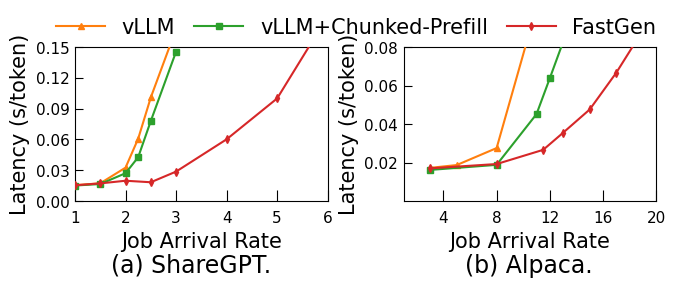

In [18]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import palettable
import random
from scipy.interpolate import interp1d

sysname = 'FastGen'

num_subfigs = 2
num_curves = 3

# Set font and figure size
font_size = 15
marker_size = 4
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)
fig_size = (7.5, 2)
fig, axes = plt.subplots(nrows=1, ncols=num_subfigs, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# line setting
colors = ['C1', 'C2', 'C3']
labels = {0: 'vLLM', 1:'vLLM+Chunked-Prefill', 2:sysname}
markers = {0: '^', 1: 's' , 2: 'd'}

# x-axis setting
x_labels = {0: 'Job Arrival Rate', 1: 'Job Arrival Rate'}

# y-axis setting
y_label = 'Latency (s/token)'

xs = [
    # Figure 1
    [
        # vLLM
        [1, 1.5, 2, 2.25, 2.5, 3],
        # FastGen-FCFS
        [1, 1.5, 2, 2.25, 2.5, 3],
        # FastGen
        [1, 1.5, 2, 2.5, 3, 4, 5, 6],
    ],
    # Figure 2
    [
        # vLLM
        [3, 5, 8, 11],
        # CP
        [3, 8, 11, 12, 13],
        # FastGen
        [3, 8, 11.5, 13, 15, 17, 20]
    ],
]
ys = [
    # Figure 1
    [
        # vLLM
        [0.01541, 0.01724, 0.03249, 0.06065, 0.10087, 0.16743],
        # CP
        [0.01506, 0.01654, 0.02705, 0.04262, 0.07794, 0.14546],
        # FastGen
        [0.01529, 0.01715, 0.01974, 0.01826, 0.02864, 0.0601, 0.09994, 0.18],
    ],
    # Figure 2
    [
        # vLLM
        [0.01721, 0.01867, 0.0275, 0.10057],
        # FastGen-FCFS
        [0.01615, 0.01878, 0.04515, 0.0638, 0.08269],
        # FastGen
        [0.01696, 0.0192, 0.02658, 0.03548, 0.04756, 0.06668, 0.09973],
    ],
]
y_limits = [0.15, 0.08]
x_ticks = [[i * 0.25 for i in range(4, 25, 4)], [i * 1 for i in range(4, 22, 4)]] 
y_ticks_list = [
    [i * 0.015 for i in range(0, 11, 2)],
    [0.02, 0.04, 0.06, 0.08],
]

print(x_ticks)

handles = [None for i in range(num_curves)]
for j in range(num_subfigs):
    ax: plt.Axes = axes[j] if num_subfigs > 1 else axes
    # Plot x ticks and label
    ax.set_xlabel(x_labels[j])
    ax.set_xlim(left=1.0, right=1.2)
    ax.get_xaxis().set_tick_params(direction='in', pad=7)
    ax.get_xaxis().set_tick_params(which='minor', direction='in')
    ax.set_xticks(x_ticks[j])
    
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
        
    # Plot y ticks and label
    ax.set_ylabel(y_label)
    ax.set_ylim(bottom=0, top=y_limits[j])
    ax.set_yticks(y_ticks_list[j])
    ax.get_yaxis().set_tick_params('major', direction='in', pad=4)
    ax.get_yaxis().set_tick_params(direction='in', pad=4)

    # Plot curves
    f_list: list = []
    for i in range(num_curves):
        handles[i], = ax.plot(xs[j][i], ys[j][i], label=labels[i], marker=markers[i], color=colors[i], markersize=marker_size, linestyle='solid', zorder=3)
    
fig.text(0.28, -0.27, '(a) ShareGPT.', fontsize=17, fontname='Times New Roman', 
        color='black', ha='center', va='bottom')
fig.text(0.73, -0.27, '(b) Alpaca.', fontsize=17, fontname='Times New Roman',  
        color='black', ha='center', va='bottom')
    
# Plot legend
fig.legend(
        handles=handles,
        handlelength=2.36, 
        ncol=num_curves,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.12),
        frameon=False,
        prop={'size':font_size},
        columnspacing=0.9
)

# Save the figure
file_path = './eval/chunked_prefill.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)
